In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X = 2 * np.random.rand(100,1)

In [3]:
y = 4 + 3 * X + np.random.randn(100,1)

In [8]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.05704183],
       [2.91480404]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05704183],
       [9.88664991]])

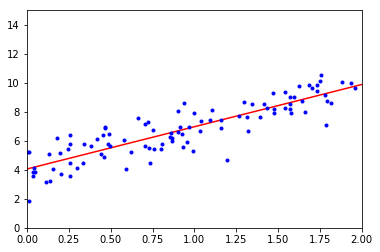

In [18]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.",label = "predictions")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression   #另一种方式写上面所有代码，用sklearn
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.97823363]), array([[2.87992754]]))

In [22]:
lin_reg.predict(X_new)

array([[4.05704183],
       [9.88664991]])

#### 计算复杂性Computational Complexity

#### 梯度下降Gradient Descent

#### 批梯度下降Batch Gradient Descent

In [1]:
eta = 0.1
n_iterations = 1000
m = 100

In [4]:
theta = np.random.randn(2,1)

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.93703416],
       [2.93388072]])

### 随机梯度下降法Stochastic Gradient Descent

In [12]:
n_epochs = 50 
t0,t1 = 5,50

In [13]:
def learning_schedule(t):
    return t0/(t + t1)

In [14]:
theta = np.random.randn(2,1)

In [16]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta * gradients

In [17]:
theta

array([[3.94964654],
       [2.92810609]])

In [10]:
from sklearn.linear_model import SGDRegressor

In [19]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91303951]), array([2.90293388]))

### 小批量梯度下降法Mini-batch Gradient Descent

### 多项式回归Polynomial Regression

In [3]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m,1)

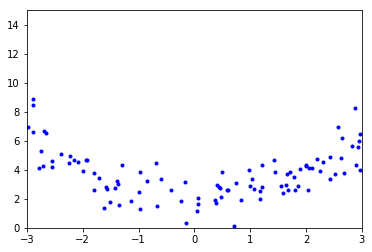

In [11]:
plt.plot(X,y,"b.")
plt.axis([-3,3,0,15])
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
X_poly = poly_features.fit_transform(X)
X[0]

array([0.60677651])

In [7]:
X_poly[0]

array([0.60677651, 0.36817773])

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.12318153]), array([[-0.07597822,  0.46498948]]))

### 学习曲线 Learning Curves

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label="val")    

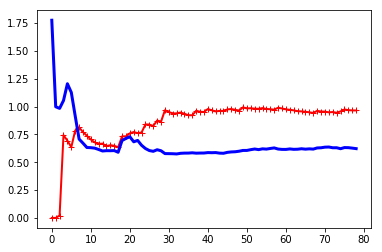

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [14]:
from sklearn.pipeline import Pipeline

In [19]:
polynomial_regression = Pipeline((("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                ("sgd_reg",LinearRegression())))

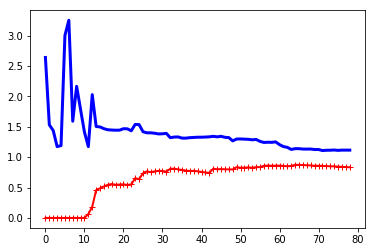

In [20]:
plot_learning_curves(polynomial_regression, X, y)

### 正则化线性模型Regularized Linear Models

#### 岭回归Ridge Regression

In [2]:
from sklearn.linear_model import Ridge

In [5]:
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.44337897]])

In [8]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

d:\python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([8.24598798])

### Lasso Regression 最小绝对收缩与选择算子回归

In [4]:
from sklearn.linear_model import Lasso

In [5]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.44219494])

### Elastic Net弹性网

In [6]:
from sklearn.linear_model import ElasticNet

In [7]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.34132268])

### Early Stopping 提前终止

In [8]:
from sklearn.base import clone

In [11]:
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005)

In [15]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined

### Logistic Regression逻辑回归

### Training and Cost Function（训练和损失函数）

### Decision Boundaries 决策边界

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'DESCR', 'target', 'feature_names', 'target_names', 'filename']

In [7]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

d:\python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

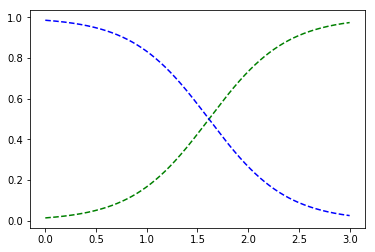

In [10]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g--",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")

In [11]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### Softmax回归

In [12]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [13]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
softmax_reg.predict([[5,2]])

array([2])

In [15]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

##### Softmax Regression decision boundaries  Softmax回归决策边界